In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree,naive_bayes
import xgboost
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

In [2]:
#loading a dataset
health=pd.read_csv("NCHS_-_Potentially_Excess_Deaths_from_the_Five_Leading_Causes_of_Death.csv")

In [3]:
health

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,All,756.0,3148377.0,451.0,305.0,40.3
1,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Metropolitan,556.0,2379871.0,341.0,217.0,39.0
2,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Nonmetropolitan,200.0,768506.0,111.0,89.0,44.5
3,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,All,756.0,3148377.0,421.0,335.0,44.3
4,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,Metropolitan,556.0,2379871.0,318.0,238.0,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205915,2015,Unintentional Injury,Wyoming,WY,8,0-84,2010 Fixed,Metropolitan,93.0,175787.0,36.0,57.0,61.3
205916,2015,Unintentional Injury,Wyoming,WY,8,0-84,2010 Fixed,Nonmetropolitan,259.0,400056.0,82.0,177.0,68.3
205917,2015,Unintentional Injury,Wyoming,WY,8,0-84,Floating,All,352.0,575843.0,137.0,215.0,61.1
205918,2015,Unintentional Injury,Wyoming,WY,8,0-84,Floating,Metropolitan,93.0,175787.0,42.0,51.0,54.8


In [4]:
#keys values of the dataset
health.keys()

Index(['Year', 'Cause of Death', 'State', 'State FIPS Code', 'HHS Region',
       'Age Range', 'Benchmark', 'Locality', 'Observed Deaths', 'Population',
       'Expected Deaths', 'Potentially Excess Deaths',
       'Percent Potentially Excess Deaths'],
      dtype='object')

In [5]:
#converting the Categorical Features into num feature
from sklearn.preprocessing import LabelEncoder
convert=LabelEncoder()

In [6]:
health['Cause of Death']=convert.fit_transform(health['Cause of Death'].astype(str))
health['Benchmark']=convert.fit_transform(health['Benchmark'].astype(str))
health['Locality']=convert.fit_transform(health['Locality'].astype(str))
health['State']=convert.fit_transform(health['State'].astype(str))
health['State FIPS Code']=convert.fit_transform(health['State FIPS Code'].astype(str))
health['Age Range']=convert.fit_transform(health['Age Range'].astype(str))

In [7]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205920 entries, 0 to 205919
Data columns (total 13 columns):
Year                                 205920 non-null int64
Cause of Death                       205920 non-null int32
State                                205920 non-null int32
State FIPS Code                      205920 non-null int32
HHS Region                           205920 non-null int64
Age Range                            205920 non-null int32
Benchmark                            205920 non-null int32
Locality                             205920 non-null int32
Observed Deaths                      195708 non-null float64
Population                           200640 non-null float64
Expected Deaths                      195708 non-null float64
Potentially Excess Deaths            195708 non-null float64
Percent Potentially Excess Deaths    195708 non-null float64
dtypes: float64(5), int32(6), int64(2)
memory usage: 15.7 MB


In [8]:
health.isnull().any()
health = health.fillna(method='ffill')

In [9]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205920 entries, 0 to 205919
Data columns (total 13 columns):
Year                                 205920 non-null int64
Cause of Death                       205920 non-null int32
State                                205920 non-null int32
State FIPS Code                      205920 non-null int32
HHS Region                           205920 non-null int64
Age Range                            205920 non-null int32
Benchmark                            205920 non-null int32
Locality                             205920 non-null int32
Observed Deaths                      205920 non-null float64
Population                           205920 non-null float64
Expected Deaths                      205920 non-null float64
Potentially Excess Deaths            205920 non-null float64
Percent Potentially Excess Deaths    205920 non-null float64
dtypes: float64(5), int32(6), int64(2)
memory usage: 15.7 MB


In [10]:
health

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2005,0,0,2,4,0,0,0,756.0,3148377.0,451.0,305.0,40.3
1,2005,0,0,2,4,0,0,1,556.0,2379871.0,341.0,217.0,39.0
2,2005,0,0,2,4,0,0,2,200.0,768506.0,111.0,89.0,44.5
3,2005,0,0,2,4,0,1,0,756.0,3148377.0,421.0,335.0,44.3
4,2005,0,0,2,4,0,1,1,556.0,2379871.0,318.0,238.0,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205915,2015,4,51,51,8,7,1,1,93.0,175787.0,36.0,57.0,61.3
205916,2015,4,51,51,8,7,1,2,259.0,400056.0,82.0,177.0,68.3
205917,2015,4,51,51,8,7,2,0,352.0,575843.0,137.0,215.0,61.1
205918,2015,4,51,51,8,7,2,1,93.0,175787.0,42.0,51.0,54.8


In [11]:
x= health.drop(['Cause of Death'],axis=1)

In [12]:
y = health['Cause of Death']

In [13]:
def feature_select(model,x,y,m):
    model.fit(x,y)
    print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    fea_import = pd.Series(model.feature_importances_, index=x.columns)
    fea_import.nlargest(m).plot(kind='barh')# for visualization . 
    plt.show()


C:\Users\aarti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.03224231 0.05708748 0.05860131 0.06169674 0.10377889 0.0165472
 0.02654834 0.13565079 0.13924963 0.13953246 0.1039565  0.12510834]


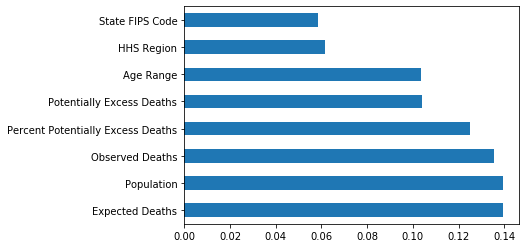

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
feature_select(model,x,y,8)

In [15]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205920 entries, 0 to 205919
Data columns (total 13 columns):
Year                                 205920 non-null int64
Cause of Death                       205920 non-null int32
State                                205920 non-null int32
State FIPS Code                      205920 non-null int32
HHS Region                           205920 non-null int64
Age Range                            205920 non-null int32
Benchmark                            205920 non-null int32
Locality                             205920 non-null int32
Observed Deaths                      205920 non-null float64
Population                           205920 non-null float64
Expected Deaths                      205920 non-null float64
Potentially Excess Deaths            205920 non-null float64
Percent Potentially Excess Deaths    205920 non-null float64
dtypes: float64(5), int32(6), int64(2)
memory usage: 15.7 MB


In [16]:
X = x.filter(['Potentially Excess Deaths','Population','Percent Potentially Excess Death','Expected Deaths','Observed Deaths','State','HHS Region','Age Range '],axis=1)
print(X.head())

   Potentially Excess Deaths  Population  Expected Deaths  Observed Deaths  \
0                      305.0   3148377.0            451.0            756.0   
1                      217.0   2379871.0            341.0            556.0   
2                       89.0    768506.0            111.0            200.0   
3                      335.0   3148377.0            421.0            756.0   
4                      238.0   2379871.0            318.0            556.0   

   State  HHS Region  
0      0           4  
1      0           4  
2      0           4  
3      0           4  
4      0           4  


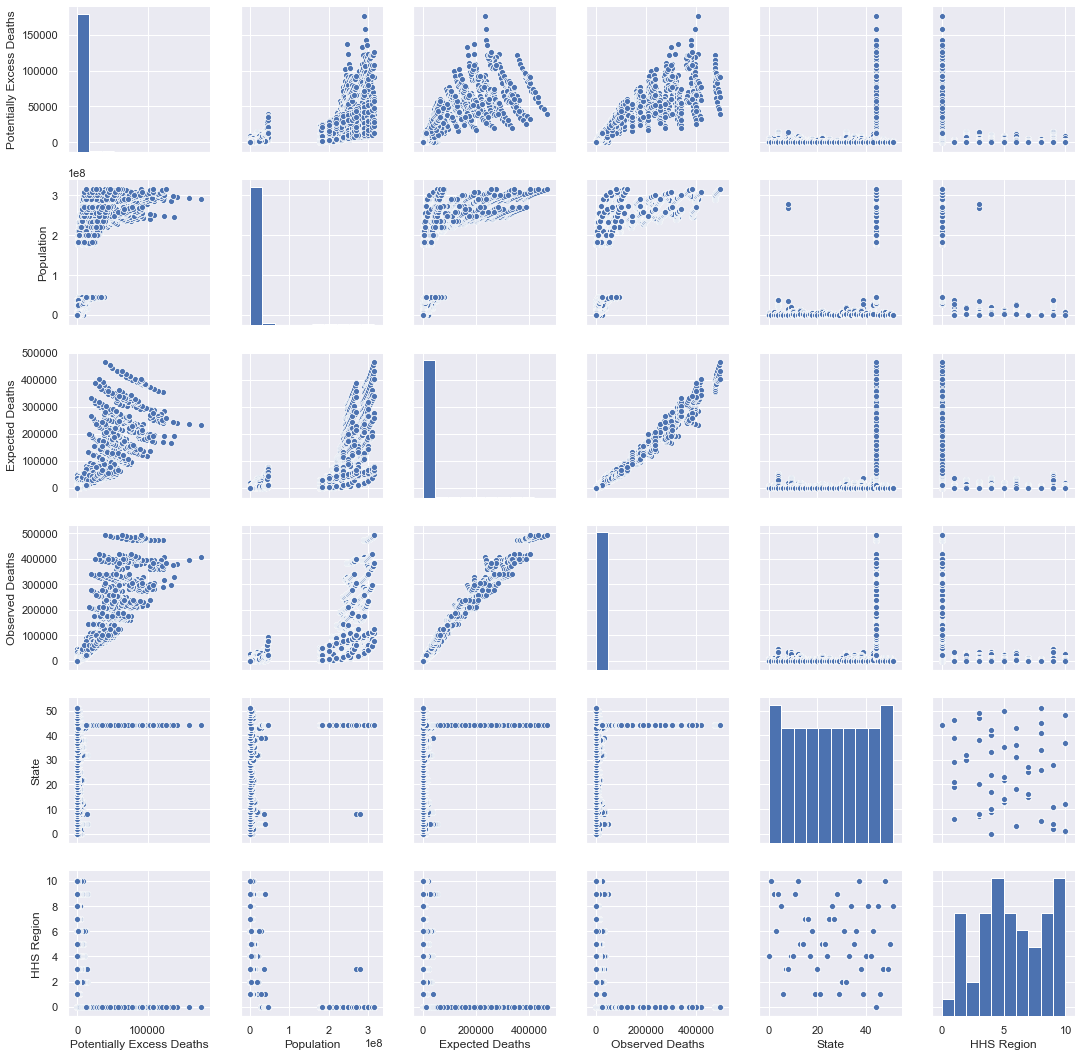

In [17]:
import seaborn as sns
sns.set()
sns.pairplot(X, height = 2.5)
plt.show()

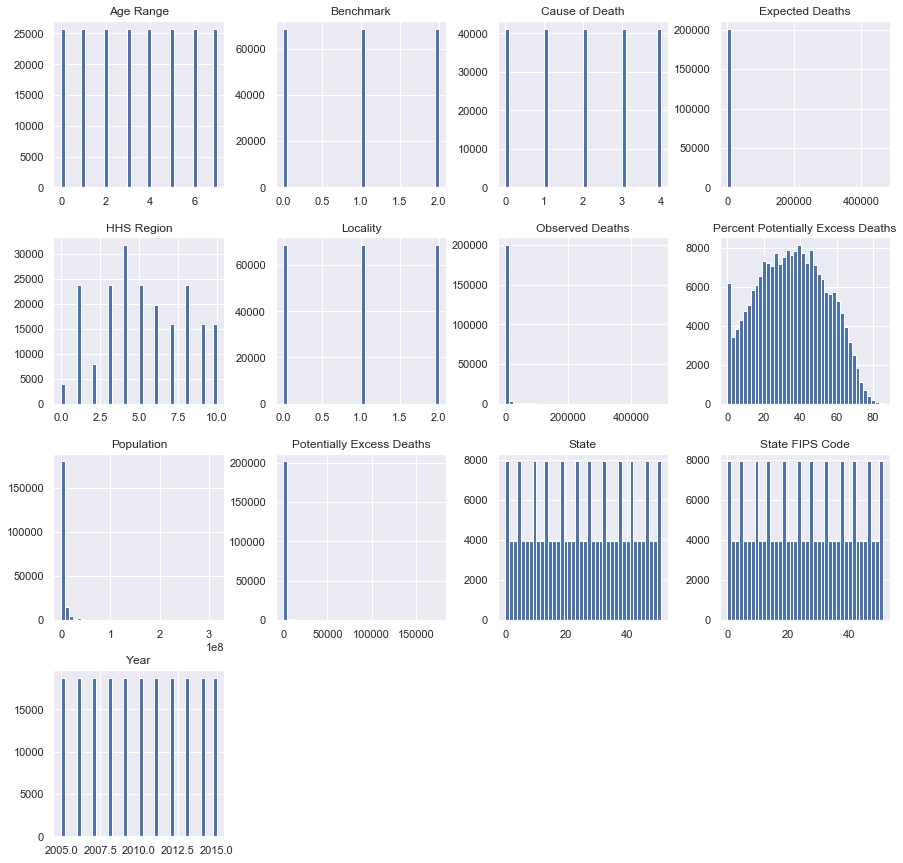

In [18]:
health.hist(bins=40,figsize=(15,15))
plt.show()

In [19]:
#descriptive statistics summary
print(health['Cause of Death'].describe())

count    205920.000000
mean          2.000000
std           1.414217
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Cause of Death, dtype: float64


In [20]:
# Checked weather Data is balanced or not
print(health.groupby('Cause of Death').size())

Cause of Death
0    41184
1    41184
2    41184
3    41184
4    41184
dtype: int64


In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True)

In [22]:
classifiers=[]

In [23]:
#Check which model have more accuracy and confusion matrix
model1 = xgboost.XGBClassifier()
classifiers.append(model1)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [24]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s\n"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s\n"%(clf, cm))

Accuracy of XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None) is 0.8193230380730381

Confusion Matrix of XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missin

C:\Users\aarti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is 0.93121114996115

Confusion Matrix of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                   

In [25]:
#size of X_train
X_train.shape

(164736, 6)

In [26]:
#Size of X_test
X_test.shape

(41184, 6)

In [27]:
#size
y_train.shape

(164736,)

In [28]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)# Train Decision Tree Classifer
y_pred = clf.predict(X_test) #Predict the response for test dataset

Confusion Matrix 
 [[7770   37  398   40   65]
 [  25 7147   74  560  339]
 [ 430   79 7657   62   98]
 [  51  646   59 7314   73]
 [  32  344  105   89 7690]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8310
           1       0.87      0.88      0.87      8145
           2       0.92      0.92      0.92      8326
           3       0.91      0.90      0.90      8143
           4       0.93      0.93      0.93      8260

    accuracy                           0.91     41184
   macro avg       0.91      0.91      0.91     41184
weighted avg       0.91      0.91      0.91     41184



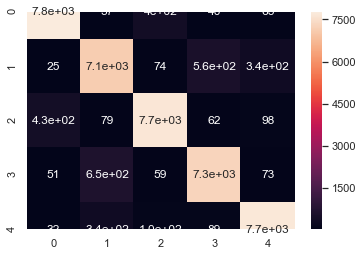

In [29]:
Clf = DecisionTreeClassifier( criterion = 'entropy', random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n',cm)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

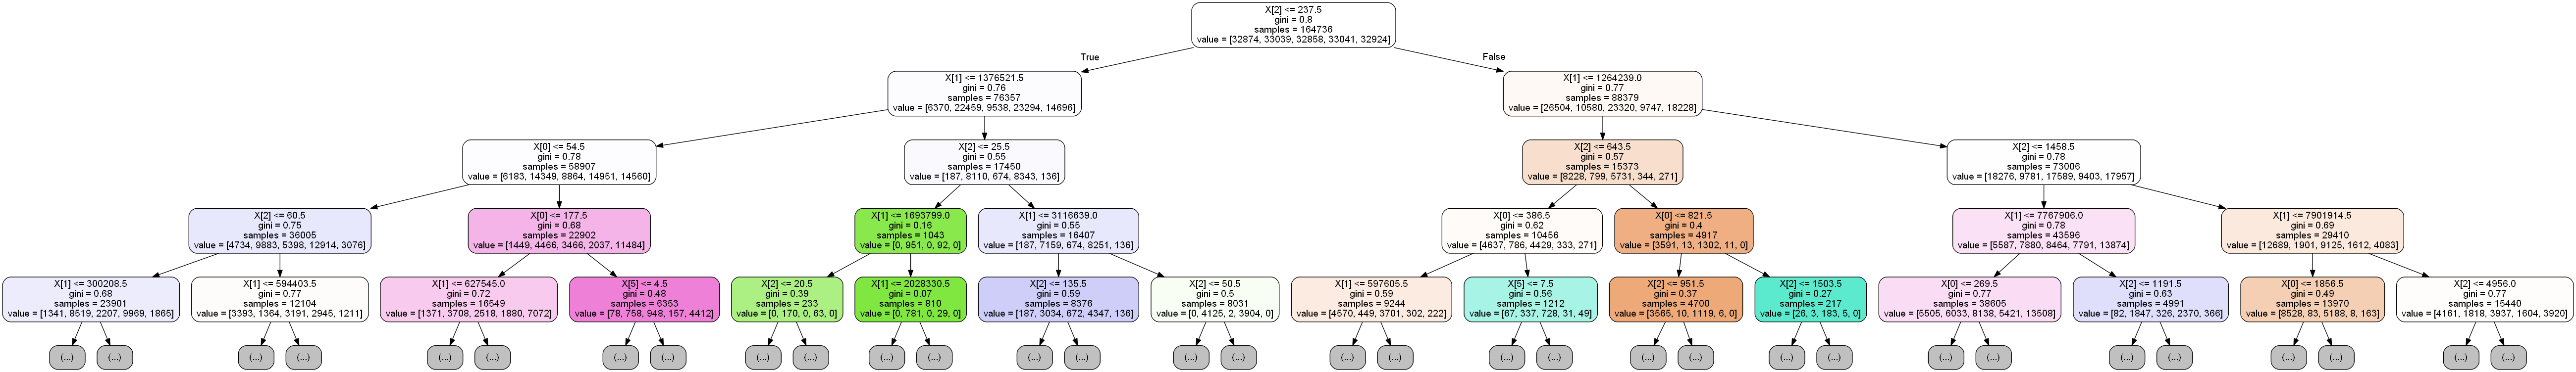

In [33]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded = True, proportion = False, 
                precision = 2,max_depth=4)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(),width=5000, height=5000)